# Prepration of the Meteorological data
## Precipitation Data
### Dataset includes the follwing informations:
`Code` : Station / region code: 16520 <br>
`DTG` : Date of the data collection <br>
`PR12 a`: Cumulative precipitation in the 00-12 hour interval [mm] <br>
`PR12 a`: Cumulative precipitation in the 12-24 hour interval [mm]

In [13]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes
from scipy.interpolate import spline
%matplotlib inline

In [14]:
# Improving the methods of reading files into the variables 
# Source: https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688
prec_16564 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16564.csv", parse_dates=["DTG"], index_col="DTG")
prec_16560 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16560.csv", parse_dates=["DTG"], index_col="DTG")
prec_16550 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16550.csv", parse_dates=["DTG"], index_col="DTG")
prec_16546 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16546.csv", parse_dates=["DTG"], index_col="DTG")
prec_16542 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16542.csv", parse_dates=["DTG"], index_col="DTG")
prec_16541 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16541.csv", parse_dates=["DTG"], index_col="DTG")
prec_16539 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16539.csv", parse_dates=["DTG"], index_col="DTG")
prec_16531 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16531.csv", parse_dates=["DTG"], index_col="DTG")
prec_16522 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16522.csv", parse_dates=["DTG"], index_col="DTG")
prec_16520 = pd.read_csv("wetransfer-5bf63a\syrep\syr_stor_16520.csv", parse_dates=["DTG"], index_col="DTG")

In [36]:
# # Selected the study period

prec_16564_selected = prec_16564["2010-01-01": "2018-06-30"]
prec_16560_selected = prec_16560["2010-01-01": "2018-06-30"]
prec_16550_selected = prec_16550["2010-01-01": "2018-06-30"]
prec_16546_selected = prec_16546["2010-01-01": "2018-06-30"]
prec_16542_selected = prec_16542["2010-01-01": "2018-06-30"]
prec_16541_selected = prec_16541["2010-01-01": "2018-06-30"]
prec_16539_selected = prec_16539["2010-01-01": "2018-06-30"]
prec_16531_selected = prec_16531["2010-01-01": "2018-06-30"]
prec_16522_selected = prec_16522["2010-01-01": "2018-06-30"]
prec_16520_selected = prec_16520["2010-01-01": "2018-06-30"]

## Resampling of time series (semi-month end frequency (15th and end of month)): `Precipitation`

In [37]:
# Morning

prec_16564_sum_am = prec_16564_selected.PR12a.resample("Y").sum()
prec_16560_sum_am = prec_16560_selected.PR12a.resample("Y").sum()
prec_16550_sum_am = prec_16550_selected.PR12a.resample("Y").sum()
prec_16546_sum_am = prec_16546_selected.PR12a.resample("Y").sum()
prec_16542_sum_am = prec_16542_selected.PR12a.resample("Y").sum()
prec_16541_sum_am = prec_16541_selected.PR12a.resample("Y").sum()
prec_16539_sum_am = prec_16539_selected.PR12a.resample("Y").sum()
prec_16531_sum_am = prec_16531_selected.PR12a.resample("Y").sum()
prec_16522_sum_am = prec_16522_selected.PR12a.resample("Y").sum()
prec_16520_sum_am = prec_16520_selected.PR12a.resample("Y").sum()

In [38]:
# Afternoon

prec_16564_sum_pm = prec_16564_selected.PR12b.resample("Y").sum()
prec_16560_sum_pm = prec_16560_selected.PR12b.resample("Y").sum()
prec_16550_sum_pm = prec_16550_selected.PR12b.resample("Y").sum()
prec_16546_sum_pm = prec_16546_selected.PR12b.resample("Y").sum()
prec_16542_sum_pm = prec_16542_selected.PR12b.resample("Y").sum()
prec_16541_sum_pm = prec_16541_selected.PR12b.resample("Y").sum()
prec_16539_sum_pm = prec_16539_selected.PR12b.resample("Y").sum()
prec_16531_sum_pm = prec_16531_selected.PR12b.resample("Y").sum()
prec_16522_sum_pm = prec_16522_selected.PR12b.resample("Y").sum()
prec_16520_sum_pm = prec_16520_selected.PR12b.resample("Y").sum()

In [39]:
# Putting all data together and rotating the row and columns

df_prec_16564 = pd.DataFrame([prec_16564_sum_am,prec_16564_sum_pm])
df_prec_16564 = df_prec_16564.T

df_prec_16560 = pd.DataFrame([prec_16560_sum_am,prec_16560_sum_pm])
df_prec_16560 = df_prec_16560.T

df_prec_16550 = pd.DataFrame([prec_16550_sum_am,prec_16550_sum_pm])
df_prec_16550 = df_prec_16550.T

df_prec_16546 = pd.DataFrame([prec_16546_sum_am,prec_16546_sum_pm])
df_prec_16546 = df_prec_16546.T

df_prec_16542 = pd.DataFrame([prec_16542_sum_am,prec_16542_sum_pm])
df_prec_16542 = df_prec_16542.T

df_prec_16541 = pd.DataFrame([prec_16541_sum_am,prec_16541_sum_pm])
df_prec_16541 = df_prec_16541.T

df_prec_16539 = pd.DataFrame([prec_16539_sum_am,prec_16539_sum_pm])
df_prec_16539 = df_prec_16539.T

df_prec_16531 = pd.DataFrame([prec_16531_sum_am,prec_16531_sum_pm])
df_prec_16531 = df_prec_16531.T

df_prec_16522 = pd.DataFrame([prec_16522_sum_am,prec_16522_sum_pm])
df_prec_16522 = df_prec_16522.T

df_prec_16520 = pd.DataFrame([prec_16520_sum_am,prec_16520_sum_pm])
df_prec_16520 = df_prec_16520.T

In [40]:
# Adding the code of the stations (Code_1)

df_prec_16564["stn_code_1"] = 16564
df_prec_16560["stn_code_1"] = 16560
df_prec_16550["stn_code_1"] = 16550
df_prec_16546["stn_code_1"] = 16546
df_prec_16542["stn_code_1"] = 16542
df_prec_16541["stn_code_1"] = 16541
df_prec_16539["stn_code_1"] = 16539
df_prec_16531["stn_code_1"] = 16531
df_prec_16522["stn_code_1"] = 16522
df_prec_16520["stn_code_1"] = 16520

In [41]:
# Reseting the index & concatenate all them together

df_prec_16564.reset_index(inplace=True)
df_prec_16560.reset_index(inplace=True)
df_prec_16550.reset_index(inplace=True)
df_prec_16546.reset_index(inplace=True)
df_prec_16542.reset_index(inplace=True)
df_prec_16541.reset_index(inplace=True)
df_prec_16539.reset_index(inplace=True)
df_prec_16531.reset_index(inplace=True)
df_prec_16522.reset_index(inplace=True)
df_prec_16520.reset_index(inplace=True)

df_met_1= pd.concat([df_prec_16564,df_prec_16560,df_prec_16550,df_prec_16546,df_prec_16542,df_prec_16541,df_prec_16539,
                  df_prec_16531,df_prec_16522,df_prec_16520],axis=0)

In [42]:
df_met_1.head()

,DTG,PR12a,PR12b,stn_code_1
0,2010-12-31,167.7,163.9,16564
1,2011-12-31,129.4,107.4,16564
2,2012-12-31,164.4,87.0,16564
3,2013-12-31,147.2,176.8,16564
4,2014-12-31,102.4,125.0,16564


# Information of the Rainfall Stations

In [43]:
# Create dataframe of the station info.

coordinate_stn = {"stn_code_1": [16564,16560,16550,16546,16542,16541,16539,16531,
                           16522,16520], "stn_name": ["Capo Carbonara", "Cagliari Elmas", "Capo Bellavista", "Decimomannu",
                                                 "Capo San Lorenzo", " Perdasdefogu", "Capo Frasca", "Olbia",
                                                "Capo Caccia", "Alghero"], "lat":[39.1038,39.25,39.9308,39.3461,39.5,39.6747,
                                                                                 39.7411,40.8986,40.5611,40.632],
                                                  "long":[9.5136,9.06, 9.713, 8.9675, 9.63,  9.443, 8.4594, 9.5177,8.163,
                                                          8.291], "stn_code_2":["LIEC", "LIEE","LIEB","LIED",
                                                                                "LIEL","LIEP", "LIEF", "LIEO", "LIEH","LIEA"]}

stn_info = pd.DataFrame(coordinate_stn, columns=["stn_code_1", "stn_name","lat", "long","stn_code_2"])

In [44]:
# Join station info. & rainfall info. together

#stn_info_join_1 = stn_info.join(df_prec_sum.set_index('stn_code_1'), on='stn_code_1')
df_prec= pd.merge(df_met_1,stn_info, on=['stn_code_1'])

In [45]:
# calculation of the sum. rainfall based on the A.M & P.M.

df_prec["sum_prec"] = df_prec.loc[:, "PR12a":"PR12b"].apply(lambda x: x.sum(), axis =1)

# Calculation of the multi-year bi-weekly aggregation

df_prec= df_prec.set_index('DTG')
df_prec['year'] = df_prec.index.year

df_prec.reset_index(inplace=True)
df_prec.set_index(['year','stn_code_1','lat','long','stn_code_2','stn_name'],inplace=True)

df_prec_sum = df_prec.groupby(['year','stn_code_1','lat','long','stn_code_2','stn_name']).sum()
df_prec_sum.head(20)

PR12a  PR12b  \
year stn_code_1 lat     long   stn_code_2 stn_name                         
2010 16520      40.6320 8.2910 LIEA       Alghero           395.4  489.4   
     16522      40.5611 8.1630 LIEH       Capo Caccia       303.2  383.9   
     16531      40.8986 9.5177 LIEO       Olbia             287.4  371.0   
     16539      39.7411 8.4594 LIEF       Capo Frasca       371.1  355.8   
     16541      39.6747 9.4430 LIEP        Perdasdefogu     257.2  274.0   
     16542      39.5000 9.6300 LIEL       Capo San Lorenzo  173.6  126.2   
     16546      39.3461 8.9675 LIED       Decimomannu       425.6  500.1   
     16550      39.9308 9.7130 LIEB       Capo Bellavista   215.3  168.6   
     16560      39.2500 9.0600 LIEE       Cagliari Elmas    275.5  252.3   
     16564      39.1038 9.5136 LIEC       Capo Carbonara    167.7  163.9   
2011 16520      40.6320 8.2910 LIEA       Alghero           347.6  285.1   
     16522      40.5611 8.1630 LIEH       Capo Caccia       252.1  226.4   
     16531      40.8986 9.5177 LIEO       Olbia             293.6  374.4   
     16539      39.7411 8.4594 LIEF       Capo Frasca       229.1  193.4   
     16541      39.6747 9.4430 LIEP        Perdasdefogu     205.4  229.0   
     16542      39.5000 9.6300 LIEL       Capo San Lorenzo  202.0  152.8   
     16546      39.3461 8.9675 LIED       Decimomannu       248.4  425.3   
     16550      39.9308 9.7130 LIEB       Capo Bellavista   249.7  354.0   
     16560      39.2500 9.0600 LIEE       Cagliari Elmas    171.7  219.9   
     16564      39.1038 9.5136 LIEC       Capo Carbonara    129.4  107.4   

                                                            sum_prec  
year stn_code_1 lat     long   stn_code_2 stn_name                    
2010 16520      40.6320 8.2910 LIEA       Alghero              884.8  
     16522      40.5611 8.1630 LIEH       Capo Caccia          687.1  
     16531      40.8986 9.5177 LIEO       Olbia                658.4  
     16539      39.7411 8.4594 LIEF       Capo Frasca          726.9  
     16541      39.6747 9.4430 LIEP        Perdasdefogu        531.2  
     16542      39.5000 9.6300 LIEL       Capo San Lorenzo     299.8  
     16546      39.3461 8.9675 LIED       Decimomannu          925.7  
     16550      39.9308 9.7130 LIEB       Capo Bellavista      383.9  
     16560      39.2500 9.0600 LIEE       Cagliari Elmas       527.8  
     16564      39.1038 9.5136 LIEC       Capo Carbonara       331.6  
2011 16520      40.6320 8.2910 LIEA       Alghero              632.7  
     16522      40.5611 8.1630 LIEH       Capo Caccia          478.5  
     16531      40.8986 9.5177 LIEO       Olbia                668.0  
     16539      39.7411 8.4594 LIEF       Capo Frasca          422.5  
     16541      39.6747 9.4430 LIEP        Perdasdefogu        434.4  
     16542      39.5000 9.6300 LIEL       Capo San Lorenzo     354.8  
     16546      39.3461 8.9675 LIED       Decimomannu          673.7  
     16550      39.9308 9.7130 LIEB       Capo Bellavista      603.7  
     16560      39.2500 9.0600 LIEE       Cagliari Elmas       391.6  
     16564      39.1038 9.5136 LIEC       Capo Carbonara       236.8

## Wind Speed & Direction, Temp. and Humidity
`DTG` : Date of the data collection <br>
`Type`: Type of bulletin: ordinary (Metar) or extraordinary (Speci) <br>
`Wnd D`: Direction of origin of the wind measured over a period of 10 min in the absence of obstacles at about 10 m from the ground <br>
`Wnd F` : Intensity (strength) of the wind: speed measured over a period of 10 min in the absence of obstacles at about 10 m from the ground [Kts] <br>
`T` : Air temperature measured in a standard environment at about 2 m from the ground <br>
`Rel hum` : Estimate of the relative humidity of the air (at about 2 m from the ground) taken from the dew point temperature [%] <br>

### Converting th Wind Direction Data from Compass Directions to Degrees

<img src="https://i.pinimg.com/originals/0c/bb/97/0cbb973c8c8c54cf8ea3601fcb981032.jpg">

In [46]:
# Impoeting the datasets

met_LIEP = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEP.csv", parse_dates=["DTG"], index_col="DTG")
met_LIEO = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEO.csv", parse_dates=["DTG"], index_col="DTG")
met_LIEL = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEL.csv", parse_dates=["DTG"], index_col="DTG")
met_LIEH = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEH.csv", parse_dates=["DTG"], index_col="DTG")
met_LIEF = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEF.csv", parse_dates=["DTG"], index_col="DTG")
met_LIEE = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEE.csv", parse_dates=["DTG"], index_col="DTG")
met_LIED = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIED.csv", parse_dates=["DTG"], index_col="DTG")
met_LIEC = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEC.csv", parse_dates=["DTG"], index_col="DTG")
met_LIEB = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEB.csv", parse_dates=["DTG"], index_col="DTG")
met_LIEA = pd.read_csv("wetransfer-5bf63a\metar\met_stor_LIEA.csv", parse_dates=["DTG"], index_col="DTG")

In [47]:
# Creation of the serie based on the Wind Directions
dir_s = pd.Series({"N": 0, "NNE":22.5, "NE":45, "ENE":67.5, "E":90, "ESE":112.5, "SE":135, "SSE":157.5,
             "S":180, "SSW":202.5, "SW":225, "WSW":247.5, "W":270, "WNW":292.5, "NW":315, "NNW":337.5, "Calma di vento":np.NaN
                  , "nd":np.NaN})

# Functions which convert Compass Directions to Degrees
def com_to_deg(dir):
    for i in dir_s.index:
        if dir == i:
            return dir_s.loc[i]

In [48]:
# Applying the created function to the datasets
met_LIEP['Wind_dir_Deg'] = met_LIEP['Wnd_D'].apply(com_to_deg)
met_LIEO['Wind_dir_Deg'] = met_LIEO['Wnd_D'].apply(com_to_deg)
met_LIEL['Wind_dir_Deg'] = met_LIEL['Wnd_D'].apply(com_to_deg)
met_LIEH['Wind_dir_Deg'] = met_LIEH['Wnd_D'].apply(com_to_deg)
met_LIEF['Wind_dir_Deg'] = met_LIEF['Wnd_D'].apply(com_to_deg)
met_LIEE['Wind_dir_Deg'] = met_LIEE['Wnd_D'].apply(com_to_deg)
met_LIED['Wind_dir_Deg'] = met_LIED['Wnd_D'].apply(com_to_deg)
met_LIEC['Wind_dir_Deg'] = met_LIEC['Wnd_D'].apply(com_to_deg)
met_LIEB['Wind_dir_Deg'] = met_LIEB['Wnd_D'].apply(com_to_deg)
met_LIEA['Wind_dir_Deg'] = met_LIEA['Wnd_D'].apply(com_to_deg)

## Resampling of time series  (semi-month end frequency (15th and end of month)): `Wind direction`, `Wind speed`, `Temp.`, `Humidity`

In [49]:
# Selected the study period

met_LIEP_selected = met_LIEP["2010-01-01": "2018-06-30"]
met_LIEO_selected = met_LIEO["2010-01-01": "2018-06-30"]
met_LIEL_selected = met_LIEL["2010-01-01": "2018-06-30"]
met_LIEH_selected = met_LIEH["2010-01-01": "2018-06-30"]
met_LIEF_selected = met_LIEF["2010-01-01": "2018-06-30"]
met_LIEE_selected = met_LIEE["2010-01-01": "2018-06-30"]
met_LIED_selected = met_LIED["2010-01-01": "2018-06-30"]
met_LIEC_selected = met_LIEC["2010-01-01": "2018-06-30"]
met_LIEB_selected = met_LIEB["2010-01-01": "2018-06-30"]
met_LIEA_selected = met_LIEA["2010-01-01": "2018-06-30"]

In [50]:
met_LIEP_selected.head()

,Type,Wnd_D,Wnd_F,Wnd_G,T_T,Rel_hum,Wind_dir_Deg
DTG,,,,,,,
2010-01-01 00:00:00,Metar,nd,NaN,NaN,NaN,NaN,NaN
2010-01-01 01:00:00,Metar,nd,NaN,NaN,NaN,NaN,NaN
2010-01-01 02:00:00,Metar,nd,NaN,NaN,NaN,NaN,NaN
2010-01-01 03:00:00,Metar,nd,NaN,NaN,NaN,NaN,NaN
2010-01-01 04:00:00,Metar,nd,NaN,NaN,NaN,NaN,NaN


In [51]:
# Wind Direction

met_LIEP_Wnd_D= met_LIEP_selected.Wind_dir_Deg.resample("Y").mean()
met_LIEO_Wnd_D= met_LIEO_selected.Wind_dir_Deg.resample("Y").mean()
met_LIEL_Wnd_D= met_LIEL_selected.Wind_dir_Deg.resample("Y").mean()
met_LIEH_Wnd_D= met_LIEH_selected.Wind_dir_Deg.resample("Y").mean()
met_LIEF_Wnd_D= met_LIEF_selected.Wind_dir_Deg.resample("Y").mean()
met_LIEE_Wnd_D= met_LIEE_selected.Wind_dir_Deg.resample("Y").mean()
met_LIED_Wnd_D= met_LIED_selected.Wind_dir_Deg.resample("Y").mean()
met_LIEC_Wnd_D= met_LIEC_selected.Wind_dir_Deg.resample("Y").mean()
met_LIEB_Wnd_D= met_LIEB_selected.Wind_dir_Deg.resample("Y").mean()
met_LIEA_Wnd_D= met_LIEA_selected.Wind_dir_Deg.resample("Y").mean()

In [52]:
# Wind Speed

met_LIEP_Wnd_F= met_LIEP_selected.Wnd_F.resample("Y").mean()
met_LIEO_Wnd_F= met_LIEO_selected.Wnd_F.resample("Y").mean()
met_LIEL_Wnd_F= met_LIEL_selected.Wnd_F.resample("Y").mean()
met_LIEH_Wnd_F= met_LIEH_selected.Wnd_F.resample("Y").mean()
met_LIEF_Wnd_F= met_LIEF_selected.Wnd_F.resample("Y").mean()
met_LIEE_Wnd_F= met_LIEE_selected.Wnd_F.resample("Y").mean()
met_LIED_Wnd_F= met_LIED_selected.Wnd_F.resample("Y").mean()
met_LIEC_Wnd_F= met_LIEC_selected.Wnd_F.resample("Y").mean()
met_LIEB_Wnd_F= met_LIEB_selected.Wnd_F.resample("Y").mean()
met_LIEA_Wnd_F= met_LIEA_selected.Wnd_F.resample("Y").mean()

In [53]:
# Temperature

met_LIEP_T= met_LIEP_selected.T_T.resample("Y").mean()
met_LIEO_T= met_LIEO_selected.T_T.resample("Y").mean()
met_LIEL_T= met_LIEL_selected.T_T.resample("Y").mean()
met_LIEH_T= met_LIEH_selected.T_T.resample("Y").mean()
met_LIEF_T= met_LIEF_selected.T_T.resample("Y").mean()
met_LIEE_T= met_LIEE_selected.T_T.resample("Y").mean()
met_LIED_T= met_LIED_selected.T_T.resample("Y").mean()
met_LIEC_T= met_LIEC_selected.T_T.resample("Y").mean()
met_LIEB_T= met_LIEB_selected.T_T.resample("Y").mean()
met_LIEA_T= met_LIEA_selected.T_T.resample("Y").mean()

In [54]:
# Humidity

met_LIEP_Rel_hum= met_LIEP_selected.Rel_hum.resample("Y").mean()
met_LIEO_Rel_hum= met_LIEO_selected.Rel_hum.resample("Y").mean()
met_LIEL_Rel_hum= met_LIEL_selected.Rel_hum.resample("Y").mean()
met_LIEH_Rel_hum= met_LIEH_selected.Rel_hum.resample("Y").mean()
met_LIEF_Rel_hum= met_LIEF_selected.Rel_hum.resample("Y").mean()
met_LIEE_Rel_hum= met_LIEE_selected.Rel_hum.resample("Y").mean()
met_LIED_Rel_hum= met_LIED_selected.Rel_hum.resample("Y").mean()
met_LIEC_Rel_hum= met_LIEC_selected.Rel_hum.resample("Y").mean()
met_LIEB_Rel_hum= met_LIEB_selected.Rel_hum.resample("Y").mean()
met_LIEA_Rel_hum= met_LIEA_selected.Rel_hum.resample("Y").mean()

In [55]:
# Putting all data together and rotating the row and columns

df_met_LIEP = pd.DataFrame([met_LIEP_Wnd_D, met_LIEP_Wnd_F,met_LIEP_T,met_LIEP_Rel_hum])
df_met_LIEP = df_met_LIEP.T

df_met_LIEO = pd.DataFrame([met_LIEO_Wnd_D, met_LIEO_Wnd_F,met_LIEO_T,met_LIEO_Rel_hum])
df_met_LIEO = df_met_LIEO.T

df_met_LIEL = pd.DataFrame([met_LIEL_Wnd_D, met_LIEL_Wnd_F,met_LIEL_T,met_LIEL_Rel_hum])
df_met_LIEL = df_met_LIEL.T

df_met_LIEH = pd.DataFrame([met_LIEH_Wnd_D, met_LIEH_Wnd_F,met_LIEH_T,met_LIEH_Rel_hum])
df_met_LIEH = df_met_LIEH.T

df_met_LIEF = pd.DataFrame([met_LIEF_Wnd_D, met_LIEF_Wnd_F,met_LIEF_T,met_LIEF_Rel_hum])
df_met_LIEF = df_met_LIEF.T

df_met_LIEE = pd.DataFrame([met_LIEE_Wnd_D, met_LIEE_Wnd_F,met_LIEE_T,met_LIEE_Rel_hum])
df_met_LIEE = df_met_LIEE.T

df_met_LIED = pd.DataFrame([met_LIED_Wnd_D, met_LIED_Wnd_F,met_LIED_T,met_LIED_Rel_hum])
df_met_LIED = df_met_LIED.T

df_met_LIEC = pd.DataFrame([met_LIEC_Wnd_D, met_LIEC_Wnd_F,met_LIEC_T,met_LIEC_Rel_hum])
df_met_LIEC = df_met_LIEC.T

df_met_LIEB = pd.DataFrame([met_LIEB_Wnd_D, met_LIEB_Wnd_F,met_LIEB_T,met_LIEB_Rel_hum])
df_met_LIEB = df_met_LIEB.T

df_met_LIEA = pd.DataFrame([met_LIEA_Wnd_D, met_LIEA_Wnd_F,met_LIEA_T,met_LIEA_Rel_hum])
df_met_LIEA = df_met_LIEA.T

In [56]:
# Adding the code of the datasets

df_met_LIEP["stn_code_2"] = "LIEP"
df_met_LIEO["stn_code_2"] = "LIEO"
df_met_LIEL["stn_code_2"] = "LIEL"
df_met_LIEH["stn_code_2"] = "LIEH"
df_met_LIEF["stn_code_2"] = "LIEF"
df_met_LIEE["stn_code_2"] = "LIEE"
df_met_LIED["stn_code_2"] = "LIED"
df_met_LIEC["stn_code_2"] = "LIEC"
df_met_LIEB["stn_code_2"] = "LIEB"
df_met_LIEA["stn_code_2"] = "LIEA"

In [57]:
# Reseting the index & concatenate all them together

df_met_LIEP.reset_index(inplace=True)
df_met_LIEO.reset_index(inplace=True)
df_met_LIEL.reset_index(inplace=True)
df_met_LIEH.reset_index(inplace=True)
df_met_LIEF.reset_index(inplace=True)
df_met_LIEE.reset_index(inplace=True)
df_met_LIED.reset_index(inplace=True)
df_met_LIEC.reset_index(inplace=True)
df_met_LIEB.reset_index(inplace=True)
df_met_LIEA.reset_index(inplace=True)

df_met_2= pd.concat([df_met_LIEP,df_met_LIEO,df_met_LIEL,df_met_LIEH,df_met_LIEF,
                  df_met_LIEE,df_met_LIED,df_met_LIEC,df_met_LIEB,df_met_LIEA],axis=0)

In [58]:
# Calculation of the multi-year bi-weekly aggregation


df_met_2= df_met_2.set_index('DTG')
df_met_2['year'] = df_met_2.index.year

df_met_2.reset_index(inplace=True)
df_met_2.set_index(['year','stn_code_2'],inplace=True)

df_met_3 = df_met_2.groupby(['year','stn_code_2']).mean()
df_met_3.head(20)

Wind_dir_Deg      Wnd_F        T_T    Rel_hum
year stn_code_2                                               
2010 LIEA          179.563816   5.550073  16.479608  76.343882
     LIEB          194.145582   8.148636  18.170199  72.597462
     LIEC          192.751770  14.911029  17.744699  77.101833
     LIED          206.128010   7.085129  17.524552  72.278645
     LIEE          233.604379   8.167420  17.464748  67.837460
     LIEF          216.626131  10.352733  17.794997  84.543319
     LIEH          190.801115   8.471845  16.088529  82.991592
     LIEL          171.970260   5.458281  21.966498  68.733881
     LIEO          177.682447   7.778686  16.925221  73.453314
     LIEP          204.717502   6.677847  17.285491  70.817473
2011 LIEA          154.075101   5.515637  16.317298  75.657831
     LIEB          185.803104   8.316795  18.301214  70.915410
     LIEC          169.016816  13.593138  18.321152  74.801630
     LIED          201.540083   6.836137  17.540428  74.133597
     LIEE          235.026395   8.491377  17.135280  67.341129
     LIEF          182.511050   9.934895  17.822481  83.716244
     LIEH          171.634893   6.804743  17.416303  83.020290
     LIEL          160.255102   5.200403  20.172831  64.484196
     LIEO          168.046932   7.043589  16.328651  69.983268
     LIEP          189.737216   6.304846  15.777093  70.614097

In [59]:
# Join rainfall info with other climate data
df_prec_sum.reset_index(inplace=True)
df_prec_sum.set_index(['year','stn_code_2'],inplace=True)

#stn_info_join_2 = stn_info_join_1.join(df_met_avg.set_index('stn_code_2'), on='stn_code_2')
df_all_data= pd.merge(df_met_3,df_prec_sum, on=['year','stn_code_2'])
df_all_data.head(20)

Wind_dir_Deg      Wnd_F        T_T    Rel_hum  stn_code_1  \
year stn_code_2                                                              
2010 LIEA          179.563816   5.550073  16.479608  76.343882       16520   
     LIEB          194.145582   8.148636  18.170199  72.597462       16550   
     LIEC          192.751770  14.911029  17.744699  77.101833       16564   
     LIED          206.128010   7.085129  17.524552  72.278645       16546   
     LIEE          233.604379   8.167420  17.464748  67.837460       16560   
     LIEF          216.626131  10.352733  17.794997  84.543319       16539   
     LIEH          190.801115   8.471845  16.088529  82.991592       16522   
     LIEL          171.970260   5.458281  21.966498  68.733881       16542   
     LIEO          177.682447   7.778686  16.925221  73.453314       16531   
     LIEP          204.717502   6.677847  17.285491  70.817473       16541   
2011 LIEA          154.075101   5.515637  16.317298  75.657831       16520   
     LIEB          185.803104   8.316795  18.301214  70.915410       16550   
     LIEC          169.016816  13.593138  18.321152  74.801630       16564   
     LIED          201.540083   6.836137  17.540428  74.133597       16546   
     LIEE          235.026395   8.491377  17.135280  67.341129       16560   
     LIEF          182.511050   9.934895  17.822481  83.716244       16539   
     LIEH          171.634893   6.804743  17.416303  83.020290       16522   
     LIEL          160.255102   5.200403  20.172831  64.484196       16542   
     LIEO          168.046932   7.043589  16.328651  69.983268       16531   
     LIEP          189.737216   6.304846  15.777093  70.614097       16541   

                     lat    long          stn_name  PR12a  PR12b  sum_prec  
year stn_code_2                                                             
2010 LIEA        40.6320  8.2910           Alghero  395.4  489.4     884.8  
     LIEB        39.9308  9.7130   Capo Bellavista  215.3  168.6     383.9  
     LIEC        39.1038  9.5136    Capo Carbonara  167.7  163.9     331.6  
     LIED        39.3461  8.9675       Decimomannu  425.6  500.1     925.7  
     LIEE        39.2500  9.0600    Cagliari Elmas  275.5  252.3     527.8  
     LIEF        39.7411  8.4594       Capo Frasca  371.1  355.8     726.9  
     LIEH        40.5611  8.1630       Capo Caccia  303.2  383.9     687.1  
     LIEL        39.5000  9.6300  Capo San Lorenzo  173.6  126.2     299.8  
     LIEO        40.8986  9.5177             Olbia  287.4  371.0     658.4  
     LIEP        39.6747  9.4430      Perdasdefogu  257.2  274.0     531.2  
2011 LIEA        40.6320  8.2910           Alghero  347.6  285.1     632.7  
     LIEB        39.9308  9.7130   Capo Bellavista  249.7  354.0     603.7  
     LIEC        39.1038  9.5136    Capo Carbonara  129.4  107.4     236.8  
     LIED        39.3461  8.9675       Decimomannu  248.4  425.3     673.7  
     LIEE        39.2500  9.0600    Cagliari Elmas  171.7  219.9     391.6  
     LIEF        39.7411  8.4594       Capo Frasca  229.1  193.4     422.5  
     LIEH        40.5611  8.1630       Capo Caccia  252.1  226.4     478.5  
     LIEL        39.5000  9.6300  Capo San Lorenzo  202.0  152.8     354.8  
     LIEO        40.8986  9.5177             Olbia  293.6  374.4     668.0  
     LIEP        39.6747  9.4430      Perdasdefogu  205.4  229.0     434.4

In [61]:
df_all_data.to_excel("D:/Behzad/Data_Thesis/thesis_py/stn_info_join_yearly.xlsx", index=True)

## Showing the datasets in the graphs for each Stations

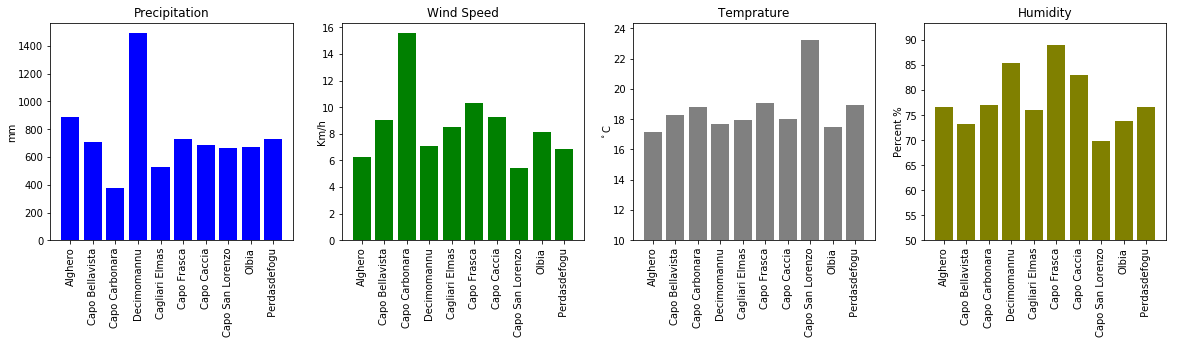

In [63]:
fig = plt.figure(figsize=(20,4))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

stn_name = list(df_all_data["stn_name"])
prec = list(df_all_data["sum_prec"])
ax1.bar(stn_name,prec, color="b")
ax1.set_title('Precipitation')
ax1.set_ylabel('mm',labelpad=1)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
    
    
WindSpd = list(df_all_data["Wnd_F"])
ax2.bar(stn_name,WindSpd, color="g")
ax2.set_title('Wind Speed')
ax2.set_ylabel('Km/h',labelpad=-5)
fig.align_ylabels(ax2)
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(90)
    

Temp = list(df_all_data["T_T"])
ax3.bar(stn_name,Temp, color="grey")
ax3.set_title('Temprature')
ax3.set_ylabel('$^\circ$C',labelpad=0)
ax3.set_ylim(bottom=10)
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(90)
    

hum = list(df_all_data["Rel_hum"])
ax4.bar(stn_name,hum, color="#808000")
ax4.set_title('Humidity')
ax4.set_ylabel('Percent %',labelpad=0)
ax4.set_ylim(bottom=50)
for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.show()

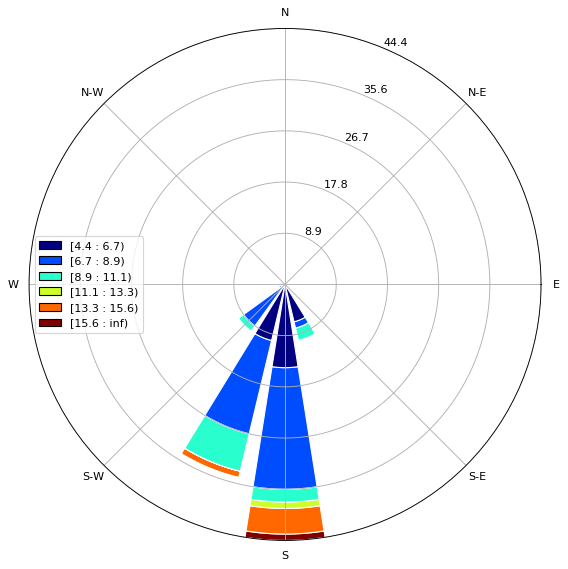

In [64]:
ws = list(df_all_data["Wnd_F"])
wd = list(df_all_data["Wind_dir_Deg"])

ax5 = WindroseAxes.from_ax()
ax5.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax5.set_legend()
ax5.legend(loc = 6).set_alpha(0.1)

plt.show()

#Source: https://github.com/python-windrose/windrose/

C:\Users\BehzadValipourShokou\Anaconda3\envs\thesis_env\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\BehzadValipourShokou\Anaconda3\envs\thesis_env\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\BehzadValipourShokou\Anaconda3\envs\thesis_env\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


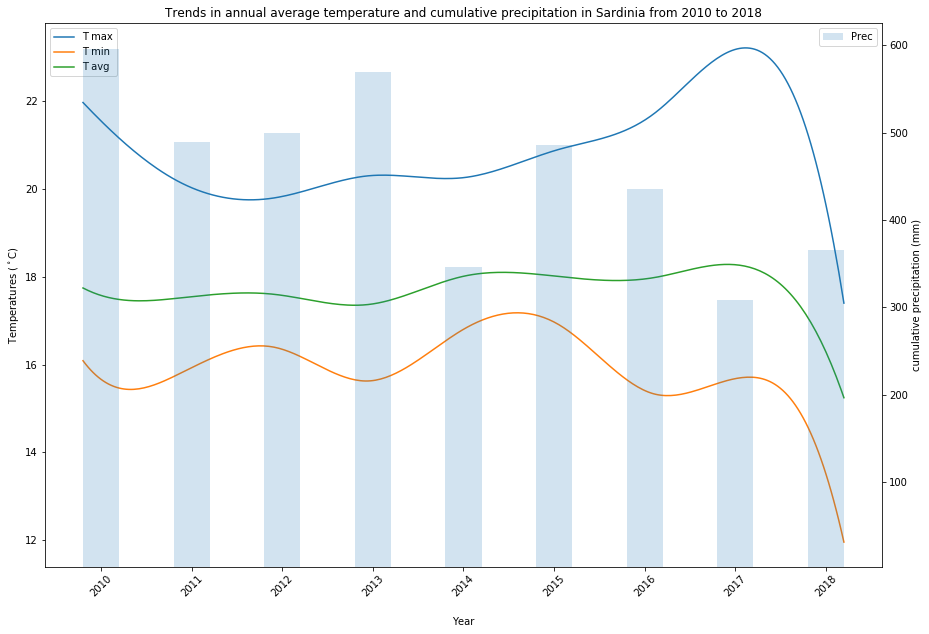

In [65]:
# Prepration data for visualization

df_met_Temp_Max = df_met_2.groupby("DTG").max().reset_index()
df_met_Temp_Min = df_met_2.groupby("DTG").min().reset_index()
df_met_Temp_Avg = df_met_2.groupby("DTG").mean().reset_index()
df_met_1["avg_prec"] = df_met_1.loc[:, "PR12a":"PR12b"].apply(lambda x: x.sum(), axis =1)
df_met_Prec_Sum = df_met_1.groupby("DTG").mean().reset_index()

# Making Graphs
x_years= [2010,2011,2012,2013,2014,2015,2016,2017,2018]
x_years_1= np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018])
x_smooth = np.linspace(x_years_1.min(), x_years_1.max(), 300)

yLeft_Temp_Max = np.array(df_met_Temp_Max["T_T"])
yLeft_Temp_Min = np.array(df_met_Temp_Min["T_T"])
yLeft_Temp_Avg = np.array(df_met_Temp_Avg["T_T"])
yRight_Prec_sum =df_met_Prec_Sum["avg_prec"]

y_smooth_Tmax = spline(x_years, yLeft_Temp_Max, x_smooth)
y_smooth_Tmin = spline(x_years, yLeft_Temp_Min, x_smooth)
y_smooth_Tavg = spline(x_years, yLeft_Temp_Avg, x_smooth)

fig = plt.figure(figsize=(15,10))

axL = fig.add_subplot(111)
axL.plot(x_smooth,y_smooth_Tmax,label= 'T max')
axL.plot(x_smooth,y_smooth_Tmin,label='T min')
axL.plot(x_smooth,y_smooth_Tavg,label='T avg')
plt.xticks([])


axL.set_ylabel("Temperatures ($^\circ$C)")
axL.set_xlabel("Year",labelpad= 50)
axL.set_title("Trends in annual average temperature and cumulative precipitation in Sardinia from 2010 to 2018")

axR =fig.add_subplot(111, frameon=False)
axR.bar(x_years,yRight_Prec_sum,label='Prec',alpha=0.2, width = 0.4)
axR.yaxis.set_label_position("right")
axR.yaxis.tick_right()

plt.xticks(np.arange(min(x_years), max(x_years)+1, 1.0), rotation= 45)
axR.set_ylim(bottom=3)
axR.set_ylabel("cumulative precipitation (mm)")


axR.legend(loc = 1)
axL.legend(loc = 2)
plt.show()

## Learning Sources:

https://www.youtube.com/watch?v=r0s4slGHwzE